In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('nurse_plant_temperatures_all_locations.csv', index_col = 0)

In [14]:
df.time = pd.to_datetime(df.time)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77946 entries, 5 to 3997
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      77946 non-null  datetime64[ns]
 1   temp      77946 non-null  float64       
 2   sensor    77946 non-null  object        
 3   plant     77946 non-null  object        
 4   location  77946 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 3.6+ MB


In [21]:
df['month'] = df.time.dt.month
df['hour'] = df.time.dt.hour 

In [22]:
df.head()

,time,temp,sensor,plant,location,month,hour
5,2023-01-02 16:00:00,13.4,open2,open,black canyon,1,16
6,2023-01-02 17:00:00,11.5,open2,open,black canyon,1,17
7,2023-01-02 18:00:00,9.9,open2,open,black canyon,1,18
8,2023-01-02 19:00:00,8.9,open2,open,black canyon,1,19
9,2023-01-02 20:00:00,8.3,open2,open,black canyon,1,20


In [25]:
total_mean_df = df.groupby(['plant', 'hour']).temp.mean().reset_index()

In [41]:
means_df = df.groupby('plant').temp.mean().reset_index()
means_df.rename(columns = {'temp' : 'mean_temp'}, inplace = True)

In [43]:
total_df = total_mean_df.merge(means_df, left_on = 'plant', right_on = 'plant')
total_df['adjusted_mean'] = total_df.temp - total_df.mean_temp

In [46]:
total_df.head()

,plant,hour,temp,mean_temp,adjusted_mean
0,A. deltoidea,0,18.055610,21.245155,-3.189545
1,A. deltoidea,1,17.494103,21.245155,-3.751051
2,A. deltoidea,2,16.907125,21.245155,-4.338029
3,A. deltoidea,3,16.390909,21.245155,-4.854246
4,A. deltoidea,4,15.826322,21.245155,-5.418832


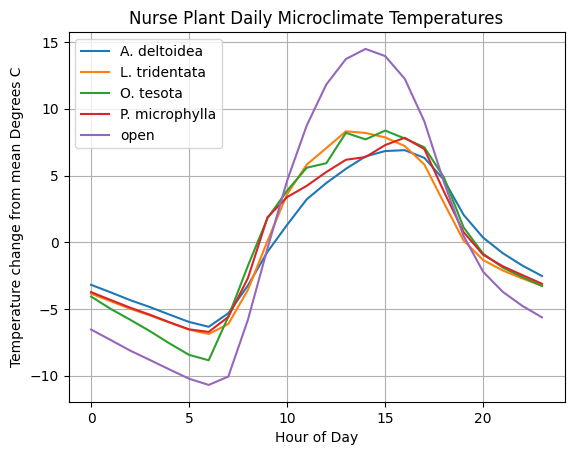

In [49]:
plt.plot(total_df[total_df.plant == 'A. deltoidea'].hour, total_df[total_df.plant == 'A. deltoidea'].adjusted_mean, label = 'A. deltoidea')
plt.plot(total_df[total_df.plant == 'L. tridentata'].hour, total_df[total_df.plant == 'L. tridentata'].adjusted_mean, label = 'L. tridentata')
plt.plot(total_df[total_df.plant == 'O. tesota'].hour, total_df[total_df.plant == 'O. tesota'].adjusted_mean, label = 'O. tesota')
plt.plot(total_df[total_df.plant == 'P. microphylla'].hour, total_df[total_df.plant == 'P. microphylla'].adjusted_mean, label = 'P. microphylla')
plt.plot(total_df[total_df.plant == 'open'].hour, total_df[total_df.plant == 'open'].adjusted_mean, label = 'open')
plt.legend()
plt.grid()
plt.ylabel('Temperature change from mean Degrees C')
plt.xlabel('Hour of Day')
plt.title('Nurse Plant Daily Microclimate Temperatures')
plt.show()

In [61]:
temp_df = pd.DataFrame(df[df.plant != 'open'])
open_df = pd.DataFrame(df[df.plant == 'open'])
open_df.drop(columns = ['month', 'hour', 'plant', 'sensor'], inplace = True)
open_df.rename(columns = {'temp' : 'open_temp'}, inplace = True)

In [63]:
merged_df = temp_df.merge(open_df, left_on = ['time', 'location'], right_on = ['time', 'location'], how = 'left')

In [ ]:
merged_df.temp - merged_df.open_temp

In [64]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179401 entries, 0 to 179400
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       179401 non-null  datetime64[ns]
 1   temp       179401 non-null  float64       
 2   sensor     179401 non-null  object        
 3   plant      179401 non-null  object        
 4   location   179401 non-null  object        
 5   month      179401 non-null  int32         
 6   hour       179401 non-null  int32         
 7   open_temp  179358 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(3)
memory usage: 9.6+ MB


In [68]:
merged_df[merged_df.open_temp.isna()].head()

,time,temp,sensor,plant,location,month,hour,open_temp
38808,2025-06-07 08:00:00,28.9,P. microphylla 1,P. microphylla,Cottonwood Creek,6,8,NaN
41326,2025-06-07 08:00:00,33.5,P. microphylla 2,P. microphylla,Cottonwood Creek,6,8,NaN
43844,2025-06-07 08:00:00,31.1,P. microphylla 3,P. microphylla,Cottonwood Creek,6,8,NaN
46362,2022-02-12 13:30:00,24.2,adelt1,A. deltoidea,wickenburg,2,13,NaN
46363,2022-02-12 14:00:00,23.2,adelt1,A. deltoidea,wickenburg,2,14,NaN


In [69]:
merged_df[merged_df.open_temp.isna()].location.value_counts()

location
wickenburg          40
Cottonwood Creek     3
Name: count, dtype: int64

In [70]:
merged_df[(merged_df.open_temp.isna()) & (merged_df.location == 'wickenburg')]

,time,temp,sensor,plant,location,month,hour,open_temp
46362,2022-02-12 13:30:00,24.2,adelt1,A. deltoidea,wickenburg,2,13,NaN
46363,2022-02-12 14:00:00,23.2,adelt1,A. deltoidea,wickenburg,2,14,NaN
49300,2022-02-27 23:30:00,14.0,adelt1,A. deltoidea,wickenburg,2,23,NaN
49301,2022-02-28 00:00:00,13.9,adelt1,A. deltoidea,wickenburg,2,0,NaN
52294,2000-01-01 00:20:00,22.8,adelt2,A. deltoidea,wickenburg,1,0,NaN
52295,2022-02-12 13:00:00,26.7,adelt2,A. deltoidea,wickenburg,2,13,NaN
52296,2022-02-12 14:00:00,22.1,adelt2,A. deltoidea,wickenburg,2,14,NaN
53769,2022-02-27 23:00:00,14.4,adelt2,A. deltoidea,wickenburg,2,23,NaN
53770,2022-02-28 00:00:00,13.9,adelt2,A. deltoidea,wickenburg,2,0,NaN
55251,2022-02-12 13:30:00,24.3,adelt3,A. deltoidea,wickenburg,2,13,NaN
